## Importing Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Loading the datasets.
df_train = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Test_set.xlsx")

In [180]:
# Top 5 rows of train data.
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [181]:
# Top 5 rows of test data.
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [182]:
# Dimensions of datasets
print(df_train.shape)
print(df_test.shape)

(10683, 11)
(2671, 10)


In Train dataset having 10683 rows and 11 columns.
In Test dataset having 2671 rows and 10 columns. In test dataset, the target variable (Price) is absent. 

In [183]:
# Combining the train and test datasets to perform data preprocessing. 
# Adding a column 'Dataset_Type' which is useful to differentiate the train and test data.

df_train['Dataset_Type'] = "Train"
df_test['Dataset_Type'] = "Test"
data = pd.concat([df_train, df_test])
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dataset_Type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,Test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,Test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,Test
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,Test


Dataset namely "data" is created by concating the train and test dataset.

## EDA and Feature Engineering

In [184]:
# Dimension of dataset.
data.shape

(13354, 12)

The dataset consists of 13354 rows and 11 columns (excluding the column "Dataset_Type").

In [185]:
# Columns Name.
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dataset_Type'],
      dtype='object')

In [186]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Dataset_Type     13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [187]:
# Datatypes of dataset
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Dataset_Type        object
dtype: object

All columns are 'object' datatype exclude 'Price' column.

In [188]:
# Statistical information
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Since all columns are object type only 'Price' column is numerical type.

In [189]:
# Checking missing values
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Dataset_Type          0
dtype: int64

The features columns'Route' and 'Total_Stops' having single null value. But in target variable column (Price) having several values are missing, because the concated test data is not having 'Price' column. hence it is showing null values.

Let's try to filling the categorical columns.

In [190]:
# Filling 'Route' column with mode
data['Route'] = data['Route'].fillna(data['Route'].mode()[0])

In [191]:
# Filling 'Total_Stops' column with mode
data['Total_Stops'] = data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [192]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Dataset_Type          0
dtype: int64

In [193]:
# Checking the unique values in 'Airline' column.
data['Airline'].nunique()

12

In [194]:
# Checking value counts in 'Airline' column.
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

## Checking Duplicates and merge in single column.

we can replace 'Jet Airways Business' with 'Jet Airways'. Similarly, 'Multiple carriers Premium economy' with 'Multiple carriers' and 'Vistara Premium economy' with 'Vistara'. 

In [195]:
data['Airline'].replace("Jet Airways Business","Jet Airways", inplace=True)
data['Airline'].replace("Multiple carriers Premium economy","Multiple carriers", inplace=True)
data['Airline'].replace("Vistara Premium economy","Vistara", inplace=True)

In [196]:
data['Airline'].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

In [197]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Dataset_Type        object
dtype: object

In [198]:
# Date and Time columns are in object type, we can convert them into datetime format.
def datetime(col):
    data[col]=pd.to_datetime(data[col])

In [199]:
for i in['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    datetime(i)

In [200]:
#Lets check dtypes after converting format.
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
Dataset_Type               object
dtype: object

In [201]:
data.loc[:,['Date_of_Journey', 'Dep_Time', 'Arrival_Time']]

,Date_of_Journey,Dep_Time,Arrival_Time
0,2019-03-24,2022-01-18 22:20:00,2022-03-22 01:10:00
1,2019-01-05,2022-01-18 05:50:00,2022-01-18 13:15:00
2,2019-09-06,2022-01-18 09:25:00,2022-06-10 04:25:00
3,2019-12-05,2022-01-18 18:05:00,2022-01-18 23:30:00
4,2019-01-03,2022-01-18 16:50:00,2022-01-18 21:35:00
...,...,...,...
2666,2019-06-06,2022-01-18 20:30:00,2022-06-07 20:25:00
2667,2019-03-27,2022-01-18 14:20:00,2022-01-18 16:55:00
2668,2019-06-03,2022-01-18 21:50:00,2022-03-07 04:25:00
2669,2019-06-03,2022-01-18 04:00:00,2022-01-18 19:15:00


In [202]:
# Creating 2 columns by converting the values in Date of journey to journey date and month.
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month
data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [203]:
# Extracting only time from 'Dep_Time' and droppind the column 'Dep_Time'.
data['Dep_hour'] = data['Dep_Time'].dt.hour
data['Dep_min'] = data['Dep_Time'].dt.minute
data.drop(['Dep_Time'], axis=1, inplace=True)

In [204]:
# Extracting only time from 'Arrival_Time' and droppind the column 'Arrival_Time'.
data['Arrival_hour'] = data['Arrival_Time'].dt.hour
data['Arrival_min'] = data['Arrival_Time'].dt.minute
data.drop(['Arrival_Time'], axis=1, inplace=True)

In [205]:
# Lets create a new column called 'duration' and extract use full data in minutes.
data['Duration']=(pd.to_timedelta(data['Duration']).dt.seconds//60).astype(str).astype(float)

In [206]:
# Dropping the column 'Duration'.
data.drop(['Duration'], axis=1, inplace=True)

In [207]:
data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [208]:
# We can replace 'No info' with 'No Info', '1 Long layover' and '2 Long layover' with 'Long layover
data['Additional_Info'].replace("No info","No Info", inplace=True)
data['Additional_Info'].replace("1 Long layover","Long layover", inplace=True)
data['Additional_Info'].replace("2 Long layover","Long layover", inplace=True)

In [209]:
data['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [210]:
data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [211]:
#  We can see 'Delhi' and 'New Delhi' is present in the column 'Destination', so, we replacing 'New Delhi' with 'Delhi'.
data['Destination']=data['Destination'].replace('New Delhi','Delhi')

In [212]:
data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [213]:
# Lets check 'Route' column
data['Route'].value_counts()

DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BLR → HBX → BOM → NAG → DEL       1
BOM → VNS → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
BOM → BLR → CCU → BBI → HYD       1
Name: Route, Length: 132, dtype: int64

In [214]:
# The Route column is having 132 unique values, extracting them as below
data['Route1']=data['Route'].str.split('→').str[0]
data['Route2']=data['Route'].str.split('→').str[1]
data['Route3']=data['Route'].str.split('→').str[2]
data['Route4']=data['Route'].str.split('→').str[3]
data['Route5']=data['Route'].str.split('→').str[4]

In [215]:
# Dropping the column 'Route'
data.drop(['Route'], axis=1, inplace=True)

In [216]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Dataset_Type           0
Day                    0
Month                  0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Route1                 0
Route2                 0
Route3              4340
Route4             11397
Route5             13296
dtype: int64

In [217]:
# Changing NaN values to 'NA'
for i in ['Route3', 'Route4', 'Route5']:
    data[i].fillna('NA', inplace=True)

In [218]:
# Lets check 'Total_Stops' column
data['Total_Stops'].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [219]:
# Encoding the column 'Total_Stops'
dict={'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(dict)

In [220]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dataset_Type,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,0,No Info,3897.0,Train,24,3,22,20,1,10,BLR,DEL,NA,NA,NA
1,Air India,Kolkata,Banglore,2,No Info,7662.0,Train,5,1,5,50,13,15,CCU,IXR,BBI,BLR,NA
2,Jet Airways,Delhi,Cochin,2,No Info,13882.0,Train,6,9,9,25,4,25,DEL,LKO,BOM,COK,NA
3,IndiGo,Kolkata,Banglore,1,No Info,6218.0,Train,5,12,18,5,23,30,CCU,NAG,BLR,NA,NA
4,IndiGo,Banglore,Delhi,1,No Info,13302.0,Train,3,1,16,50,21,35,BLR,NAG,DEL,NA,NA


## Label Encoder

In [221]:
# Applying Label encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    data[i]=LE.fit_transform(data[i])

## Data Visualization

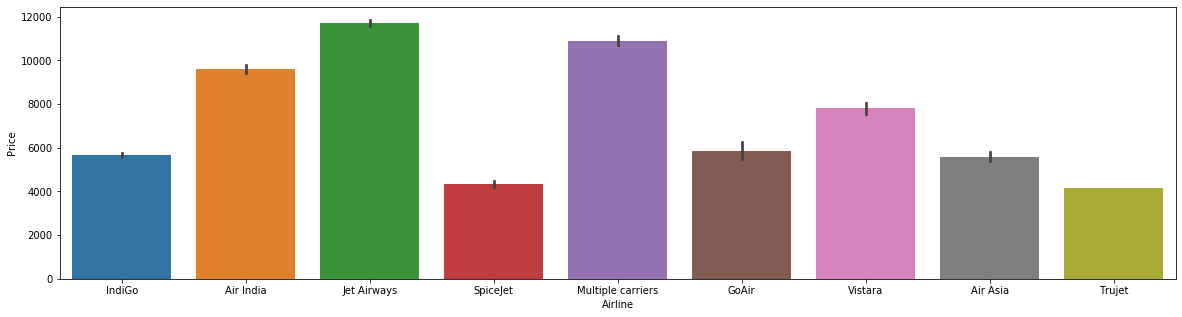

In [222]:
# Lets check Airline column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Airline', y='Price', data=data)
plt.show()

Jet Airways is observed as the highest flight price among all the Airlines and SpiceJet is having low price.

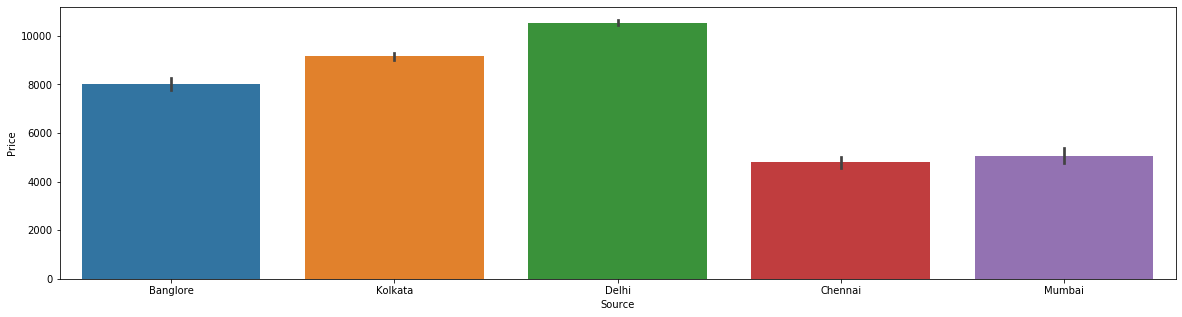

In [223]:
# Lets check Source column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Source', y='Price', data=data)
plt.show()

People who travelled from Delhi have paid morethan others.

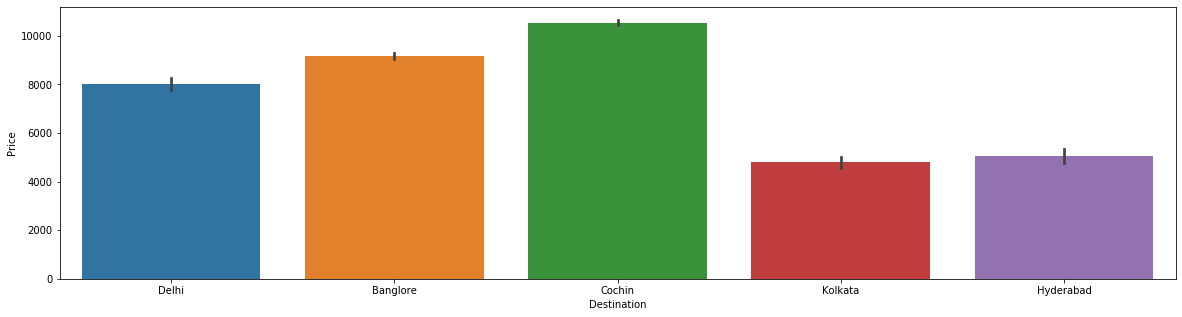

In [224]:
# Lets check Destination column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Destination', y='Price', data=data)
plt.show()

People who travelled to Cochin have paid more flight price compare to all.

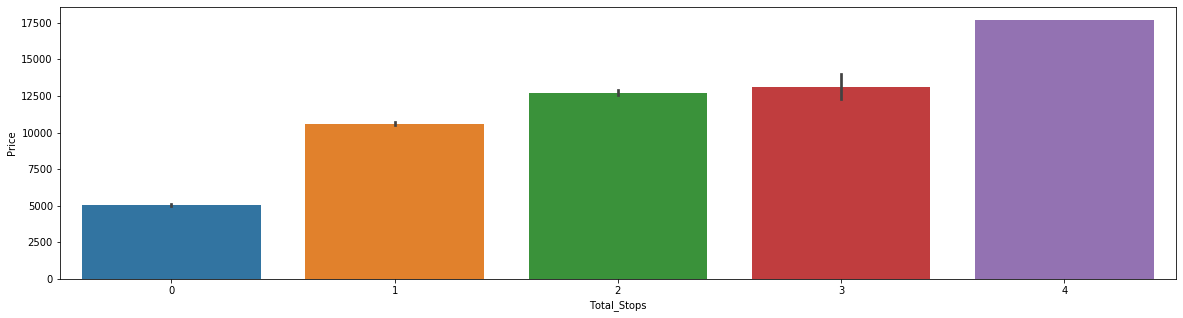

In [225]:
# Lets check Total_Stops column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Total_Stops', y='Price', data=data)
plt.show()

We can see that, if the total stops are 4, then the flight price is high.

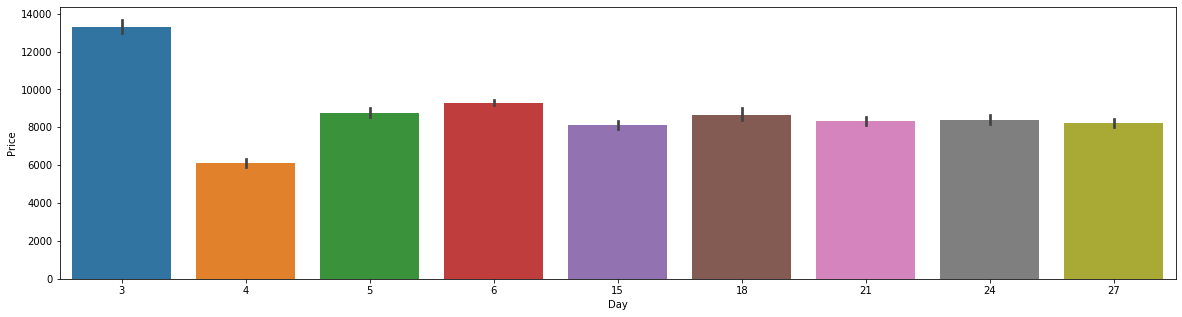

In [226]:
# Lets check Day column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Day', y='Price', data=data)
plt.show()

We can see that 3rd date of month having high price values.

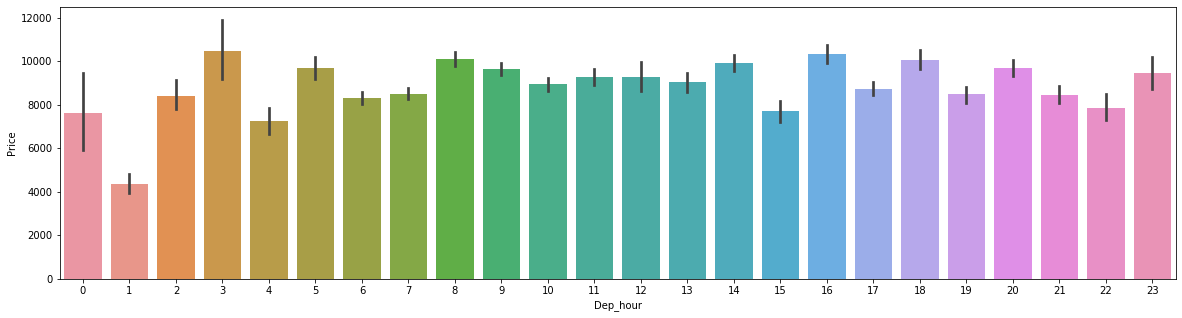

In [227]:
# Lets check Dep_hour column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Dep_hour', y='Price', data=data)
plt.show()

We can see that 3AM in Dep_hour is having high price values.

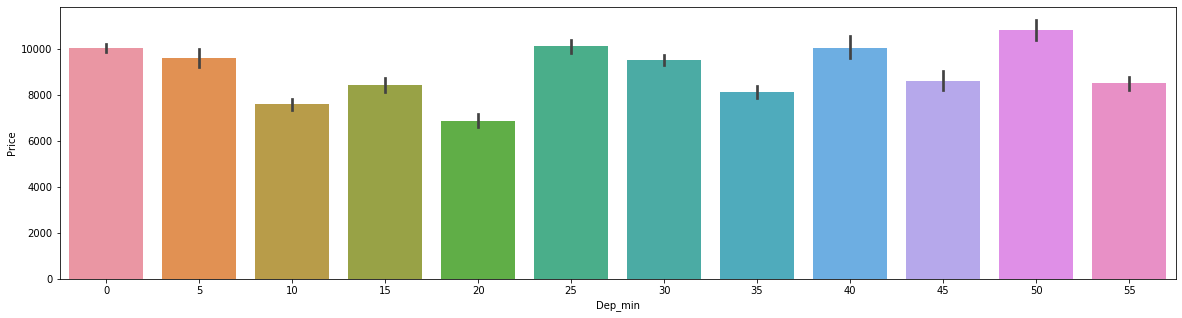

In [228]:
# Lets check Dep_min column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Dep_min', y='Price', data=data)
plt.show()

We can see that in 50th minute is having high price values.

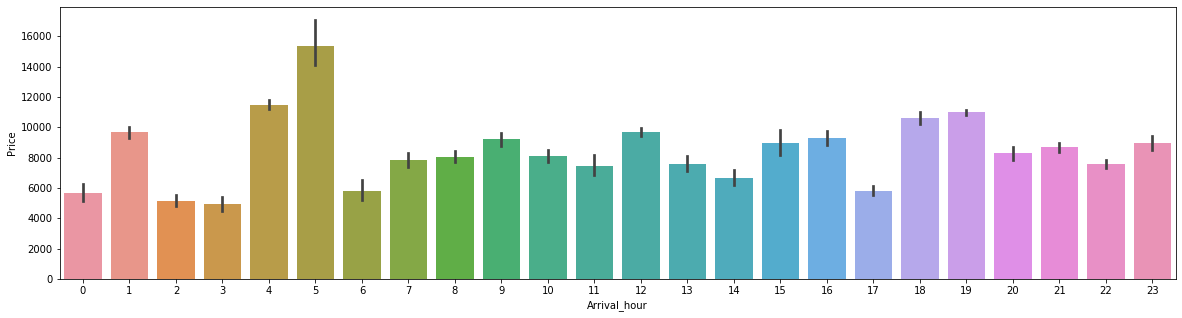

In [229]:
# Lets check Arrival_hour column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Arrival_hour', y='Price', data=data)
plt.show()

We can see that in 5AM in Arrival_hour is having high price values.

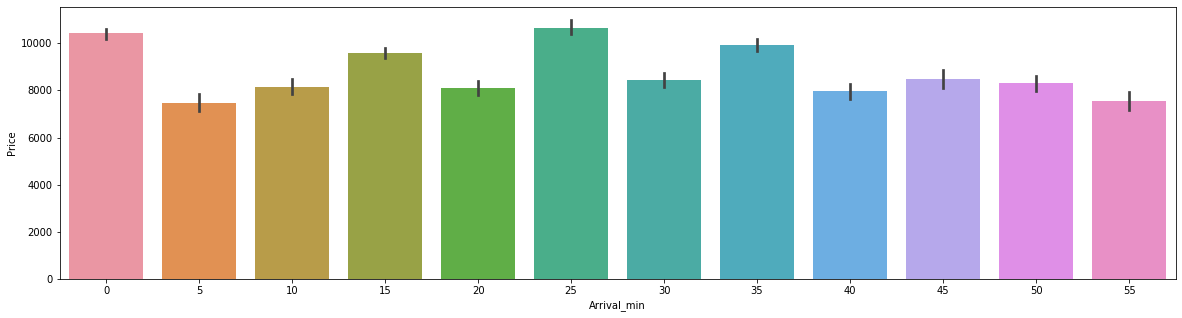

In [230]:
# Lets check Arrival_min column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Arrival_min', y='Price', data=data)
plt.show()

We can see that in 25th minute is having high price values.

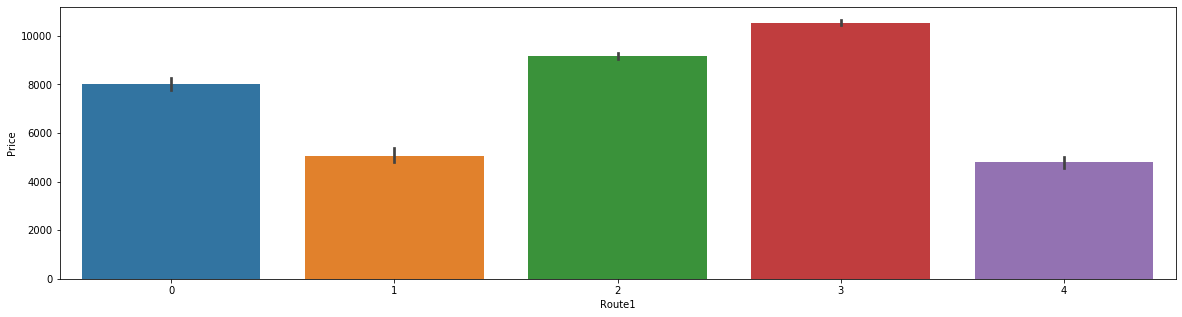

In [231]:
# Lets check Route1 column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Route1', y='Price', data=data)
plt.show()

We can see that in Route1, 3rd way is having high price values.

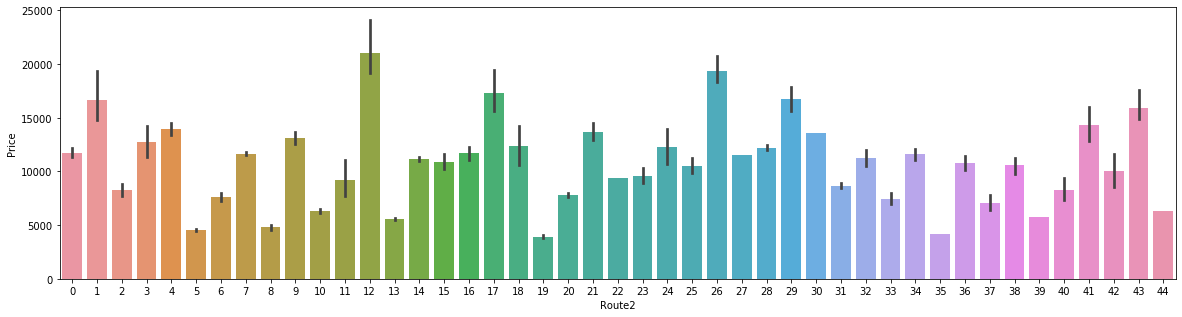

In [232]:
# Lets check Route2 column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Route2', y='Price', data=data)
plt.show()

We can see that in Route2, 12th way is having high price values

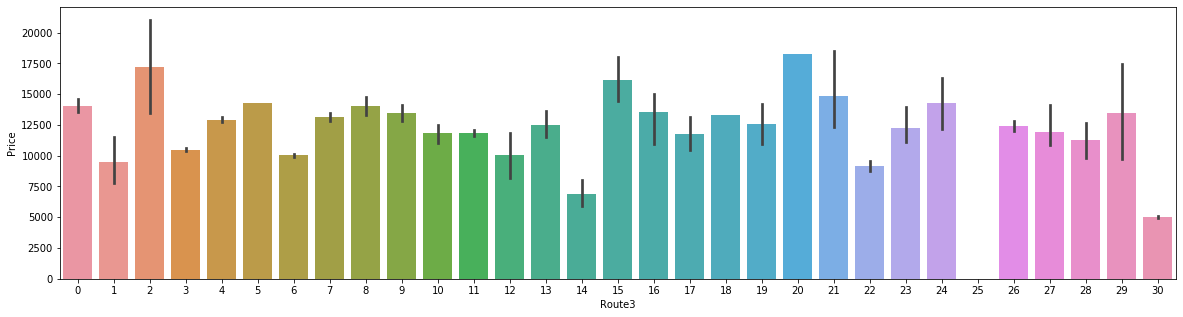

In [233]:
# Lets check Route3 column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Route3', y='Price', data=data)
plt.show()

We can see that in Route3, 20th way is having high price values

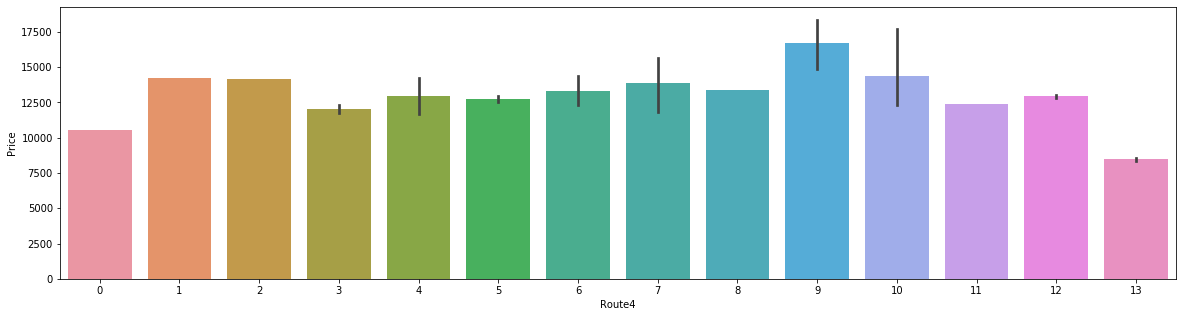

In [234]:
# Lets check Route4 column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Route4', y='Price', data=data)
plt.show()

We can see that in Route4, 9th way is having high price values

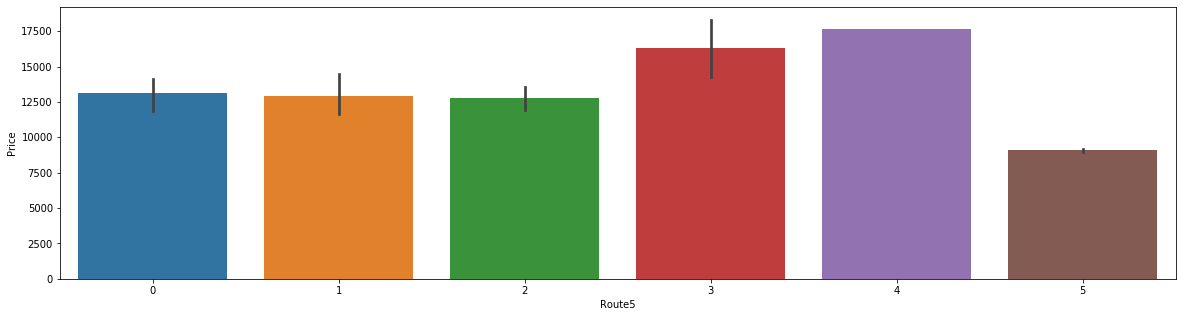

In [235]:
# Lets check Route5 column vs. Price column
plt.figure(figsize=(20,5))
sns.barplot(x='Route5', y='Price', data=data)
plt.show()

We can see that in Route5, 4th way is having high price values

In [236]:
# Correlation of dataset
corr = data.corr()
corr

,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
Total_Stops,1.000000,0.603883,-0.027965,0.068745,-0.070709,-0.000116,0.037154,-0.108233,0.431280,0.159711,-0.802622,-0.728865,-0.208131
Price,0.603883,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155,0.182135,-0.087218,-0.592577,-0.316937,-0.055643
Day,-0.027965,-0.165412,1.000000,-0.263645,-0.006490,-0.018639,0.000968,-0.019054,0.081961,-0.014057,0.038540,-0.013052,0.005394
Month,0.068745,0.010700,-0.263645,1.000000,0.024008,0.002174,-0.001319,-0.028378,0.050653,0.003820,-0.071318,-0.044196,-0.004985
Dep_hour,-0.070709,0.006819,-0.006490,0.024008,1.000000,-0.026674,0.004296,0.067645,-0.053095,-0.131233,0.024309,0.052972,0.050172
Dep_min,-0.000116,-0.024492,-0.018639,0.002174,-0.026674,1.000000,0.043967,-0.018133,-0.071679,0.091329,0.048739,-0.045230,0.003910
Arrival_hour,0.037154,0.024264,0.000968,-0.001319,0.004296,0.043967,1.000000,-0.150636,0.013436,-0.007660,-0.082959,0.050719,-0.021275
Arrival_min,-0.108233,-0.086155,-0.019054,-0.028378,0.067645,-0.018133,-0.150636,1.000000,-0.181512,0.049134,0.163935,-0.022289,0.008619
Route1,0.431280,0.182135,0.081961,0.050653,-0.053095,-0.071679,0.013436,-0.181512,1.000000,-0.081742,-0.481416,-0.197170,-0.015023
Route2,0.159711,-0.087218,-0.014057,0.003820,-0.131233,0.091329,-0.007660,0.049134,-0.081742,1.000000,0.000047,-0.262773,-0.088645


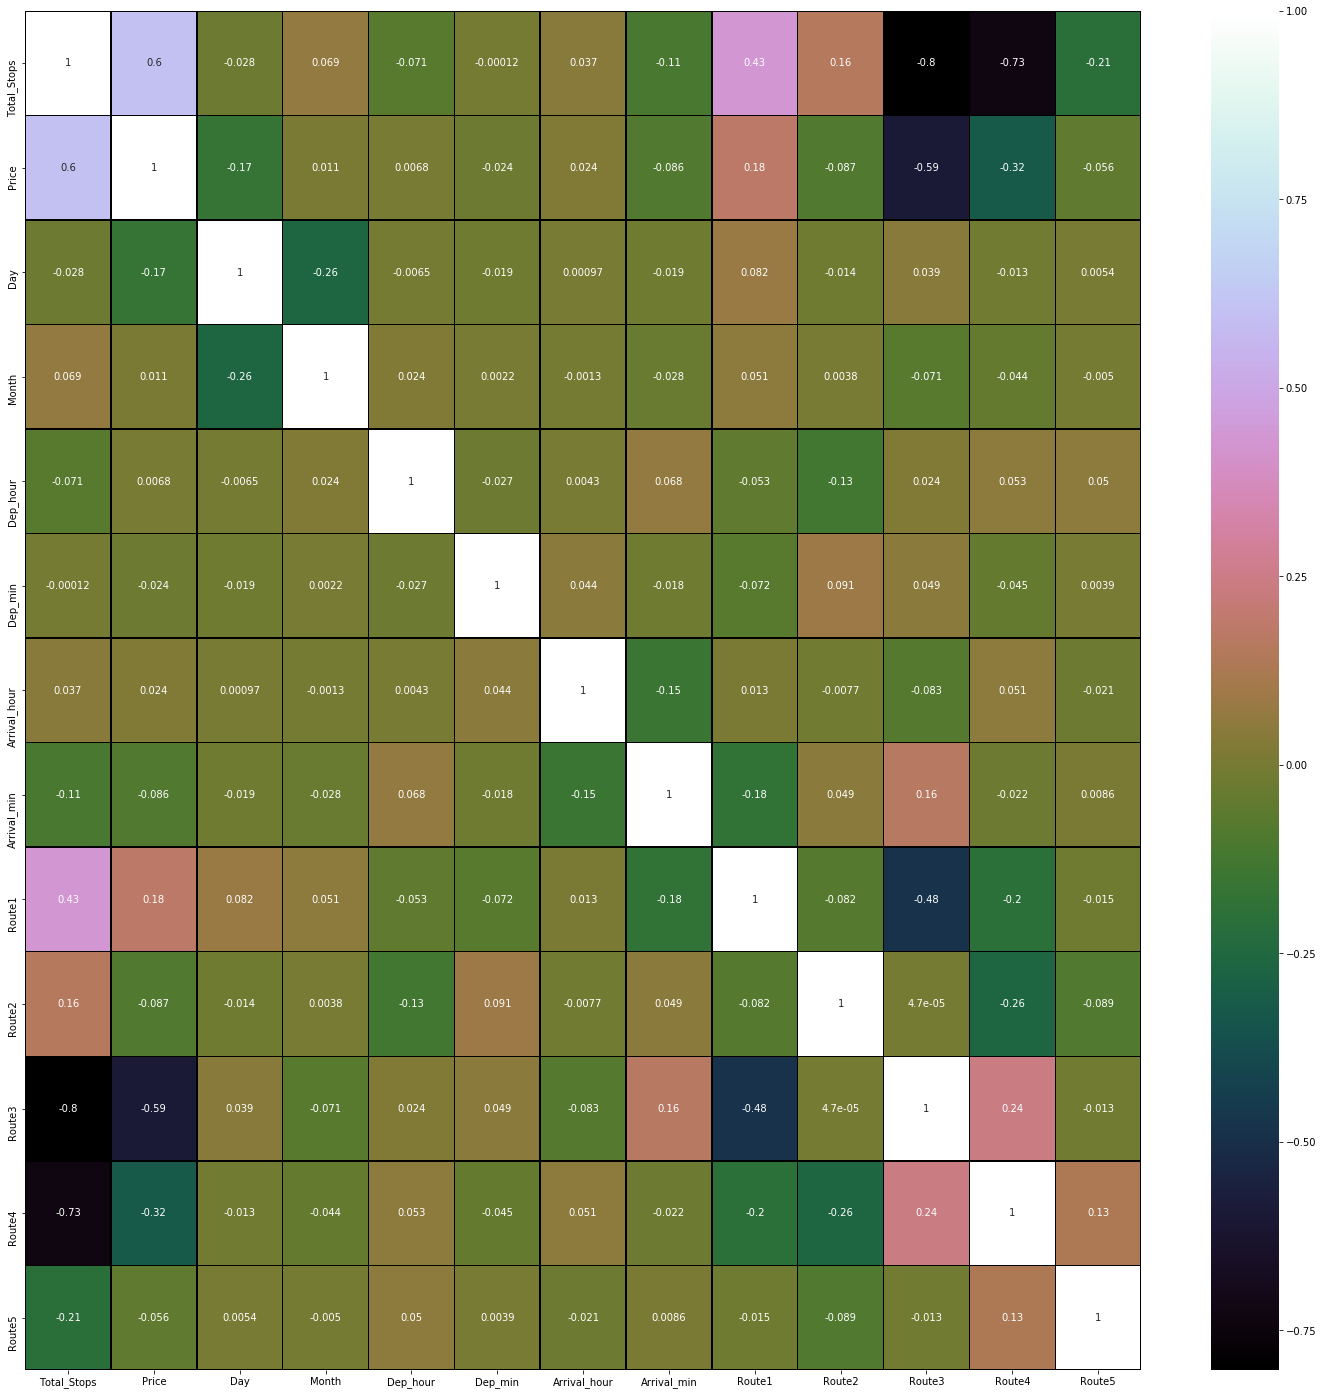

In [237]:
# Heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, cmap='cubehelix', linewidth=0.5, linecolor='black', annot=True)
plt.show()

Price is highly positive correlated with 'Total_stops' and highly negative correlated with 'Route2' and 'Route3'

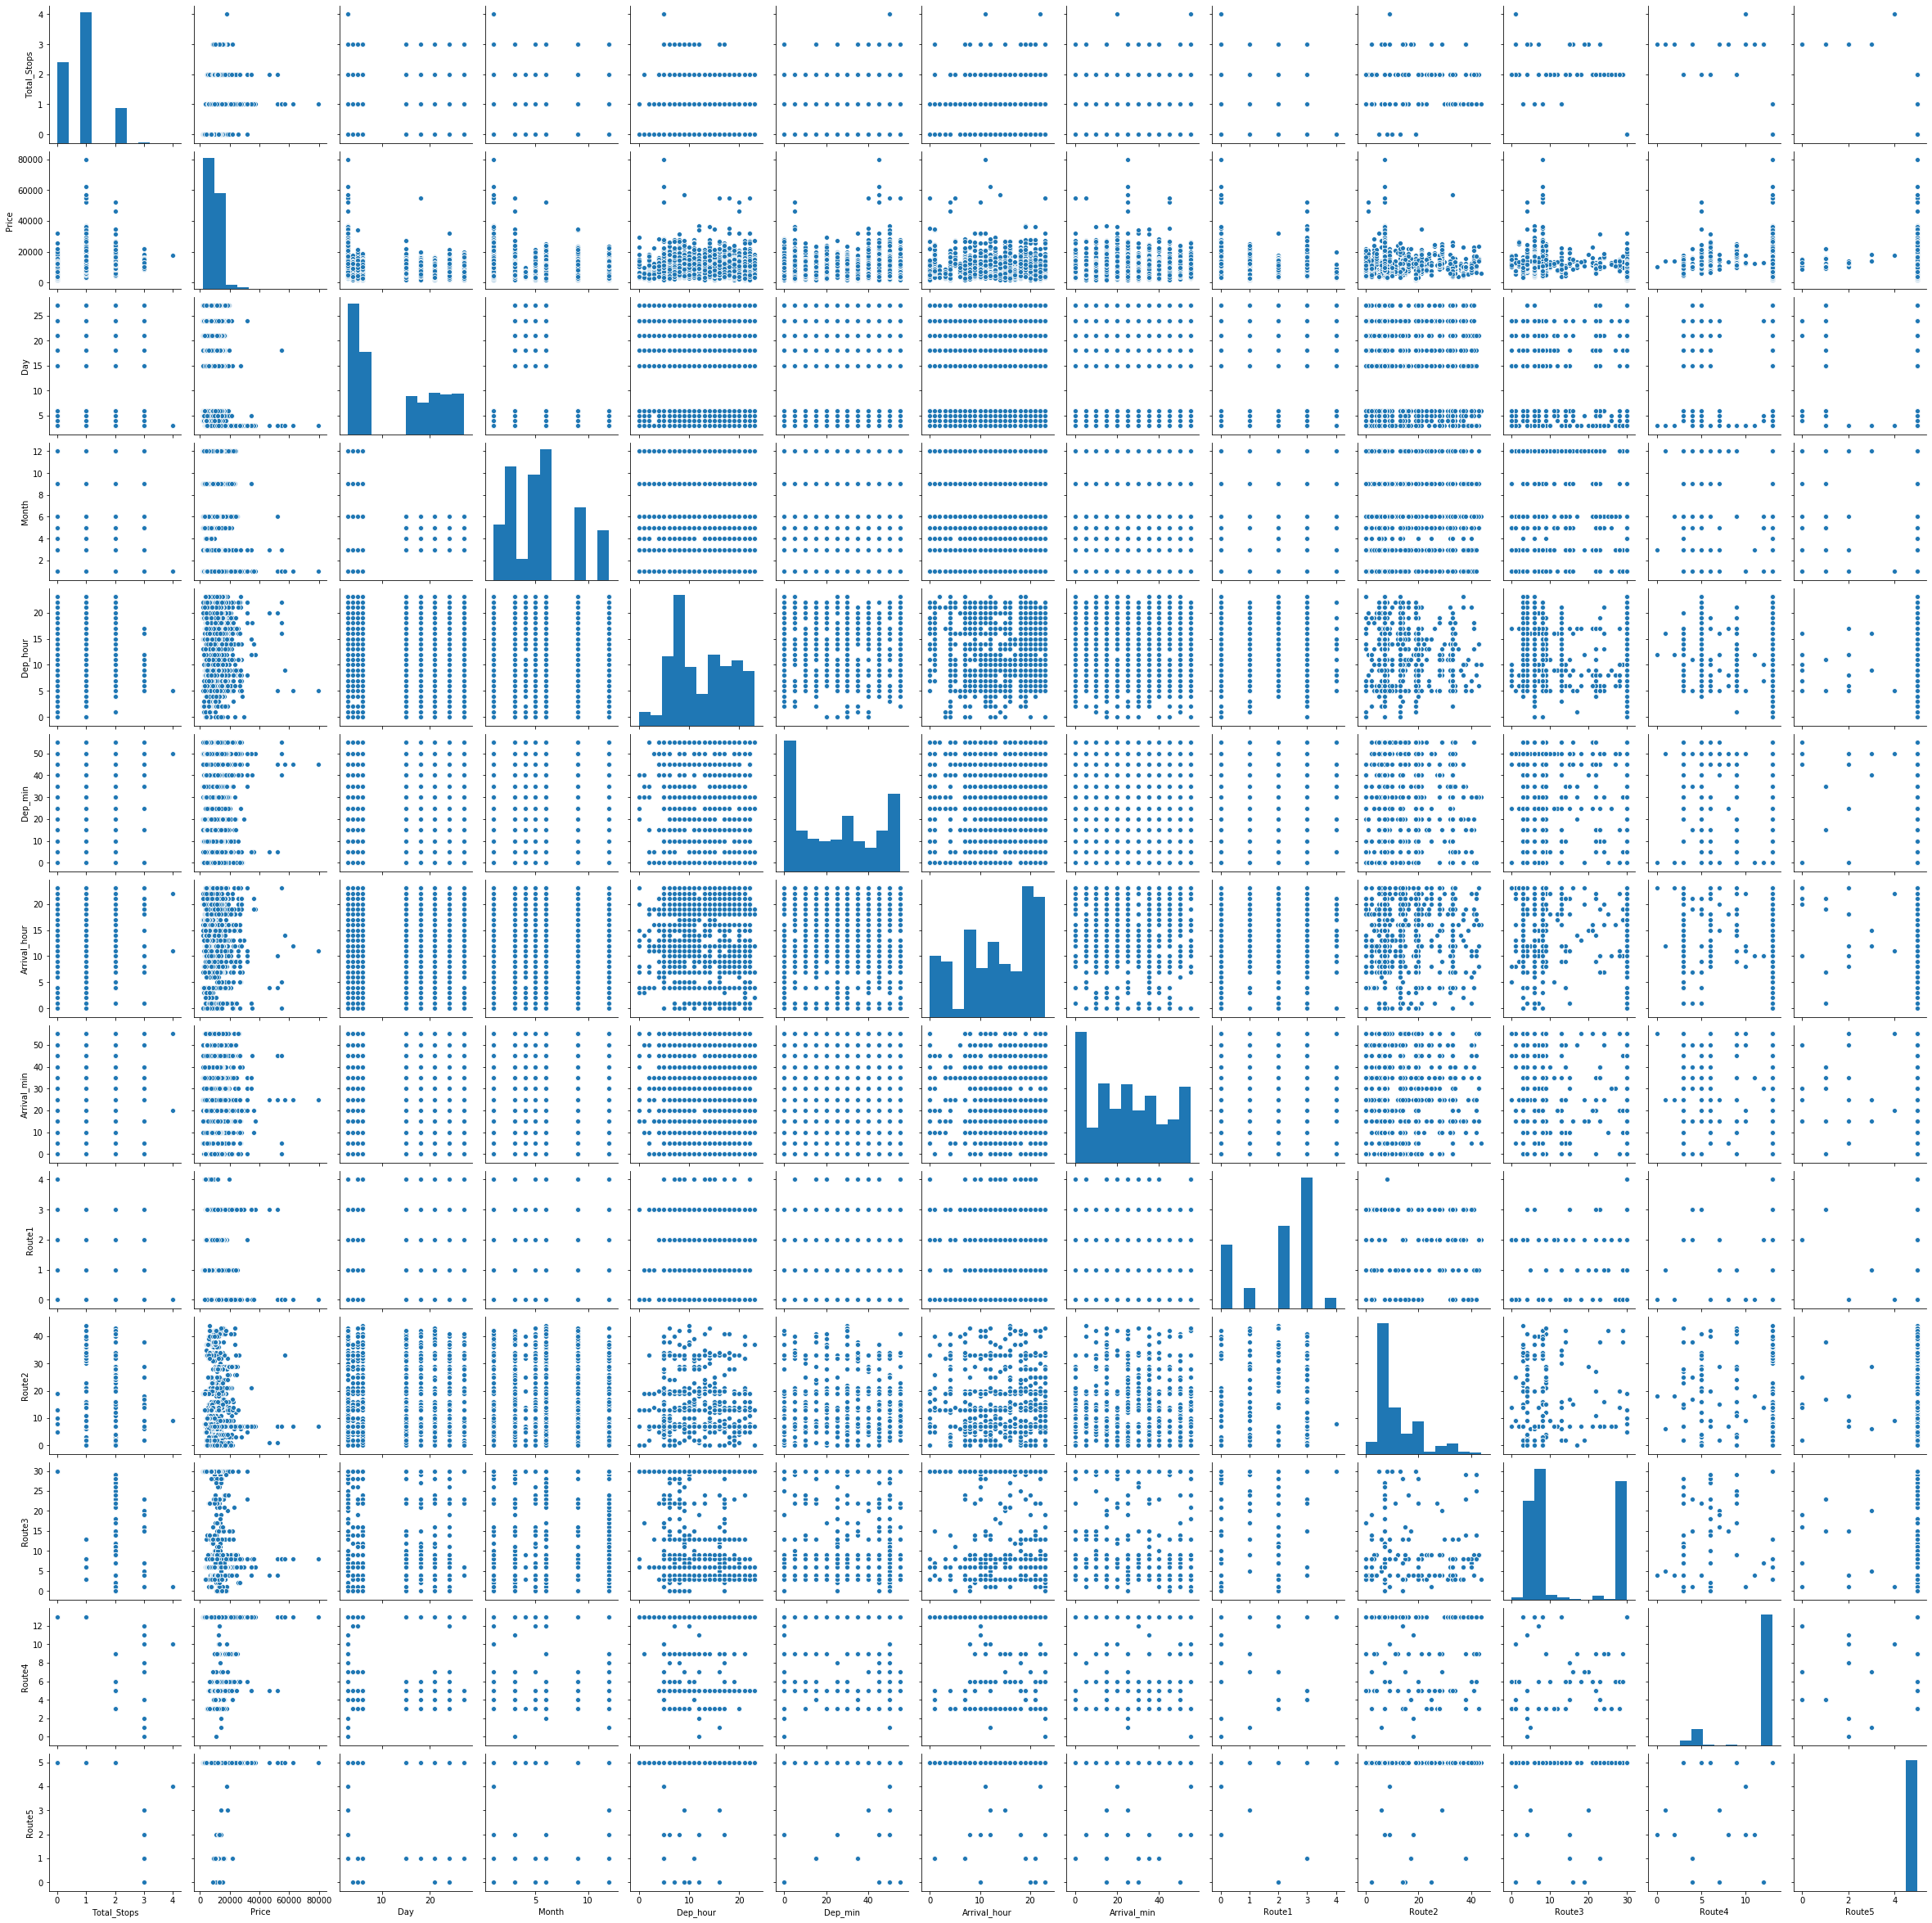

In [238]:
sns.pairplot(data)

1st day of month have high prices.

Journey month 3 have high price of flights.

Dep_hour at 5, prices are high.

Dep_min between 50-40 have prices are high.

Arrival_min between 30-20 have prices are high.

## Outlier Removal in target variable

In [359]:
def outliers_IQR3(data_frame, feature_name):
    IQR=data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_boundary=data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary=data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    data.loc[data[feature_name] >= upper_boundary, feature_name] = upper_boundary
    data.loc[data[feature_name] <= lower_boundary, feature_name] = lower_boundary

In [360]:
outliers_IQR3(data, 'Price')

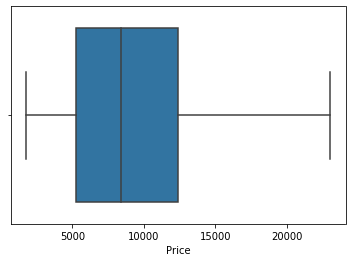

In [361]:
# Lets check Outliers using box plot
sns.boxplot(data.Price)

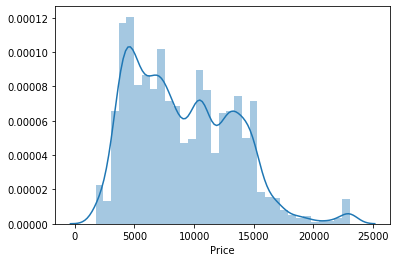

In [362]:
# Lets check the distribution of target variable column.
sns.distplot(data.Price[:10683])
plt.show()

Target variable is now normally distributed.

In [363]:
data.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Additional_Info     object
Price              float64
Dataset_Type        object
Day                  int64
Month                int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
Route1               int32
Route2               int32
Route3               int32
Route4               int32
Route5               int32
dtype: object

In [364]:
OHC = ['Airline', 'Source', 'Destination', 'Additional_Info']
df=pd.get_dummies(data=data, columns=OHC)

In [365]:
pd.set_option('display.max_columns', None)
df

,Total_Stops,Price,Dataset_Type,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897.0,Train,24,3,22,20,1,10,0,13,30,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2,7662.0,Train,5,1,5,50,13,15,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,13882.0,Train,6,9,9,25,4,25,3,32,4,5,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,6218.0,Train,5,12,18,5,23,30,2,34,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,13302.0,Train,3,1,16,50,21,35,0,34,8,13,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,Test,6,6,20,30,20,25,2,14,3,13,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2667,0,NaN,Test,27,3,14,20,16,55,2,5,30,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2668,1,NaN,Test,3,6,21,50,4,25,3,7,6,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2669,1,NaN,Test,3,6,4,0,19,15,3,7,6,13,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [393]:
# Lets seprate the train and test data.
df_train=df.loc[df['Dataset_Type']=="Train"]
df_test=df.loc[df['Dataset_Type']=="Test"]

In [394]:
df_test.reset_index(drop=True, inplace=True)

In [395]:
df_test.drop(columns=["Price", "Dataset_Type"], inplace=True)
df_train.drop(columns=["Dataset_Type"], inplace=True)

## Splitting the dataset into x and y variables.

In [396]:
x = df_train.drop('Price', axis=1)
y = df_train['Price']

In [397]:
print(x.shape)
print(y.shape)

(10683, 39)
(10683,)


## Scaling the Data

In [398]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-1.220744,1.285632,-0.848503,1.654259,-0.235050,-1.800427,-0.890057,-1.674292,0.137712,1.397854,0.409722,0.064204,-0.175441,-0.442912,-0.135998,2.050269,-0.751390,-0.357229,-0.287957,-0.009676,-0.217371,1.965335,-0.19231,-0.859188,-0.606227,-0.264193,-0.606227,-0.859188,1.965335,-0.264193,-0.19231,-0.009676,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676
1,1.741483,-0.872652,-1.517993,-1.303095,1.363492,-0.050851,-0.587124,-0.016142,1.636622,-1.067996,-2.982557,0.064204,-0.175441,2.257787,-0.135998,-0.487741,-0.751390,-0.357229,-0.287957,-0.009676,-0.217371,-0.508819,-0.19231,-0.859188,1.649546,-0.264193,1.649546,-0.859188,-0.508819,-0.264193,-0.19231,-0.009676,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676
2,1.741483,-0.759058,1.159966,-0.607247,0.031373,-1.363033,0.018744,0.812933,2.510986,-0.812908,-2.304101,0.064204,-0.175441,-0.442912,-0.135998,-0.487741,1.330867,-0.357229,-0.287957,-0.009676,-0.217371,-0.508819,-0.19231,1.163890,-0.606227,-0.264193,-0.606227,1.163890,-0.508819,-0.264193,-0.19231,-0.009676,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676
3,0.260370,-0.872652,2.164201,0.958411,-1.034321,1.407129,0.321677,-0.016142,2.760805,-0.897938,0.409722,0.064204,-0.175441,-0.442912,-0.135998,2.050269,-0.751390,-0.357229,-0.287957,-0.009676,-0.217371,-0.508819,-0.19231,-0.859188,1.649546,-0.264193,1.649546,-0.859188,-0.508819,-0.264193,-0.19231,-0.009676,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676
4,0.260370,-1.099840,-1.517993,0.610487,1.363492,1.115533,0.624611,-1.674292,2.760805,-0.472791,0.409722,0.064204,-0.175441,-0.442912,-0.135998,2.050269,-0.751390,-0.357229,-0.287957,-0.009676,-0.217371,1.965335,-0.19231,-0.859188,-0.606227,-0.264193,-0.606227,-0.859188,1.965335,-0.264193,-0.19231,-0.009676,-0.019354,-0.025606,-0.477273,-0.043309,0.528874,-0.175724,-0.009676


Now, Data is scaled using StandardScaler.

## Model Buliding

In [399]:
# Importing required libraries and metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [400]:
#Finding the best random state
max_r_score=0
for r_state in range(42, 100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to", final_r_state, "is", max_r_score)

max r2 score corresponding to 77 is 0.7166187182464371


In [401]:
# Creating train test split using best random state
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=77)

## Finding the best performing model

In [402]:
LR = LinearRegression()
l = Lasso()
rd = Ridge()
en = ElasticNet()
dtr = DecisionTreeRegressor()
svr = SVR()
knr = KNeighborsRegressor()
rf = RandomForestRegressor()

In [403]:
models = []
models.append(('Linear Regression', LR))
models.append(('Lasso Regression', l))
models.append(('Ridge Regression', rd))
models.append(('ElasticNet Regression', en))
models.append(('Decision Tree Regressor', dtr))
models.append(('Support Vector Regressor', svr))
models.append(('KNeighbors Regressor', knr))
models.append(('Random Forest Regressor',rf))

In [404]:
Model = []
Score = []
CVS = []
SD = []
MAE = []
MSE = []
RMSE = []

for name, model in models:
    print('********************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ', AS)
    Score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Validation Score: ', sc)
    CVS.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ', std)
    SD.append(std)
    print('\n')
    mae=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ', mae)
    MAE.append(mae)
    print('\n')
    mse=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ', mse)
    MSE.append(mse)
    print('\n')
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ', rmse)
    RMSE.append(rmse)
    print('\n')

******************************** Linear Regression ********************************


LinearRegression()


r2_score:  0.7166187182464371


Cross Validation Score:  -5.470045838071281e+22


Standard Deviation:  1.093948086909331e+23


Mean Absolute Error:  1694.0160584112996


Mean Squared Error:  5102814.473659127


Root Mean Squared Error:  2258.941007122392


******************************** Lasso Regression ********************************


Lasso()


r2_score:  0.7168683439686447


Cross Validation Score:  0.6974872571265213


Standard Deviation:  0.011846054229099734


Mean Absolute Error:  1693.0966406481114


Mean Squared Error:  5098319.491702673


Root Mean Squared Error:  2257.945856680951


******************************** Ridge Regression ********************************


Ridge()


r2_score:  0.7166698395522106


Cross Validation Score:  0.6972190518294944


Standard Deviation:  0.011886480394920265


Mean Absolute Error:  1693.8145552336277


Mean Squared Error:  5101893.

In [405]:
# Result store in Dataframe
Result = pd.DataFrame({'Model': Model, 'r2 Score':Score, 'Cross Validation Score':CVS, 'Standard Deviation':SD, 'Mean Absolute Error':MAE, 'Mean Squared Error':MSE, 'Root Mean Squared Error':RMSE})
Result

,Model,r2 Score,Cross Validation Score,Standard Deviation,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,71.661872,-5.470046e+24,1.093948e+23,1694.016058,5.102814e+06,2258.941007
1,Lasso Regression,71.686834,6.974873e+01,1.184605e-02,1693.096641,5.098319e+06,2257.945857
2,Ridge Regression,71.666984,6.972191e+01,1.188648e-02,1693.814555,5.101894e+06,2258.737244
3,ElasticNet Regression,66.685234,6.460865e+01,1.354948e-02,1858.460687,5.998952e+06,2449.275823
4,Decision Tree Regressor,89.731155,8.949555e+01,6.293169e-03,575.939089,1.849099e+06,1359.815866
5,Support Vector Regressor,5.828653,6.329523e+00,9.660052e-03,3390.049785,1.695733e+07,4117.927546
6,KNeighbors Regressor,84.040697,8.111287e+01,8.399312e-03,1072.536172,2.873773e+06,1695.220770
7,Random Forest Regressor,94.048828,9.324015e+01,4.599981e-03,532.775694,1.071621e+06,1035.191174


We can see that Random Forest Regressor is performing well compared to other algorithms.

In [407]:
# Predicting using Random Forest
y_pred = rf.predict(x_test)

In [408]:
# Score for train
rf.score(x_train, y_train)

0.9872796446907169

In [409]:
# Score for test
rf.score(x_test, y_test)

0.9404882799297509

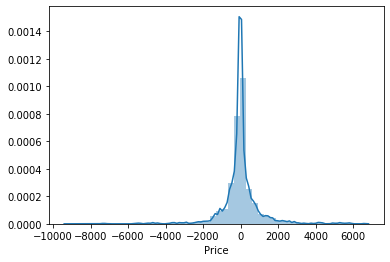

In [410]:
# Plotting distplot
sns.distplot(y_test - y_pred)
plt.show()

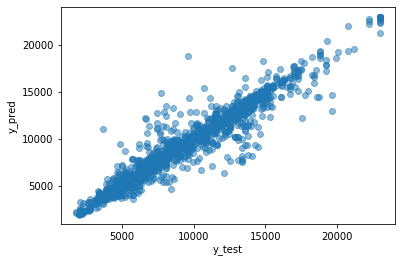

In [411]:
# Ploting scatterplot
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [412]:
# Finding r2_score
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9404882799297509

Now we will perform Hyperparameter Tuning to improve our model and also boosting the scores too.

## Hyperparameter Tuning

In [413]:
from sklearn.model_selection import RandomizedSearchCV
# No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# No.of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum No. of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Minimum No. of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum No. of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [414]:
# Create the random grid
random_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

In [416]:
# Random search of parameters, using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error',
                              n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [417]:
# Fitting the model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  22.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  17.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [418]:
# Finding out the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [419]:
# Predicting using tunned model
prediction = rf_random.predict(x_test)

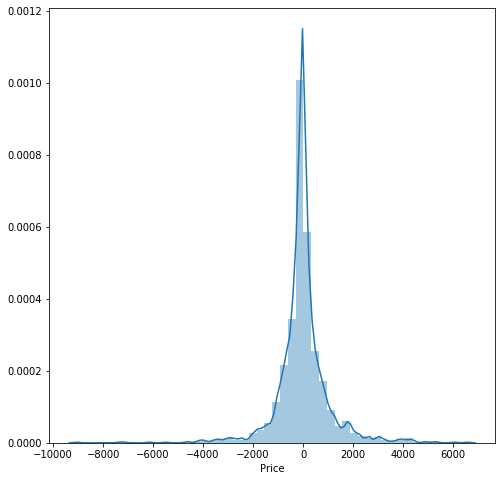

In [420]:
# Plotting the distplot
plt.figure(figsize=(8,8))
sns.distplot(y_test - prediction)
plt.show()

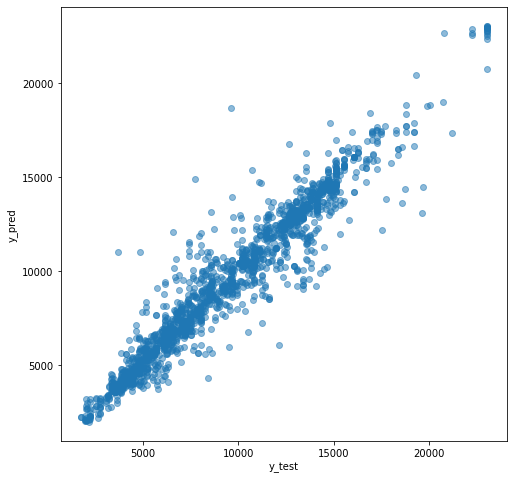

In [422]:
# Plotting the scatterplot
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [423]:
# Printing the finalized with metrics scores
print('r2_score: ',r2_score(y_test, prediction)*100)
print('\n')
print('Mean Absolute Error: ', mean_absolute_error(y_test,prediction))
print('Mean Squared Error: ', mean_squared_error(y_test,prediction))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,prediction)))

r2_score:  93.84809959305932


Mean Absolute Error:  610.2643713905815
Mean Squared Error:  1107765.701488564
Root Mean Squared Error:  1052.504490008743


After applying Hyperparameter tuning using RandomizedSearchCV, we can observed that r2_score has been slightly decreases (i.e, 94.04% to 93.84%). 

Finally, we can save RandomForestRegressor as our model.

## Saving the model

In [428]:
import pickle

# Open a file, where you want to store the model data
file = open('flightprice_rf.pkl', 'wb')

# Dump information to that file
pickle.dump(rf, file)

In [429]:
# Loading the dumped model
model = open('flightprice_rf.pkl', 'rb')
forest = pickle.load(model)

In [431]:
# Prediction
y_prediction = forest.predict(x_test)

In [433]:
# Checking out r2_score
metrics.r2_score(y_test, y_prediction)

0.9404882799297509